In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


df= pd.read_csv(r"C:\Users\annat\Downloads\online_shoppers_intention.csv")

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

# Getting information about the dataset
print("\nDataset Info:")
df.info()

# Basic descriptive statistics for numerical columns
print("\nDescriptive statistics:")
print(df.describe())

print("\n Columns:",df.columns)

First 5 rows of the dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               4                52.000000              1   
2               4               106.500000              0   
3               9               497.166667              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               6              1156.500000   
1                     7.0              46              3087.000000   
2                     0.0              12               806.250000   
3                     0.0              20              1170.166667   
4                     0.0               3                17.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.033333    0.000000         0.0   Nov                 2   
1     0.003774   0.021384   1

Accuracy: 0.8596918085969181

 Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.91      0.92      2087
        True       0.54      0.58      0.56       379

    accuracy                           0.86      2466
   macro avg       0.73      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466



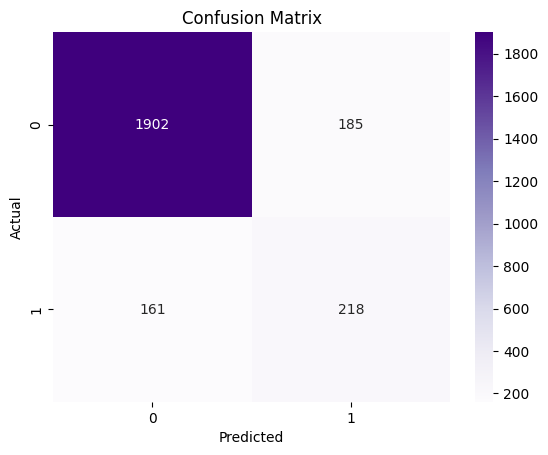

In [6]:
label_encoders = {}
for col in ['Month', 'VisitorType', 'Weekend']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('Revenue', axis=1)  #input features
Y = df['Revenue']               #target variable

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=4)
model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\n Classification Report:\n",classification_report(Y_test, Y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()